# PRIYANKA PRAKASH KATARIYA | BL.EN.U4AIE21107

# LAB ASSIGNMENT-4 | 22nd February 2024

In [1]:
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
from pydub import AudioSegment
from pydub.playback import play
import numpy as np

/Users/localadmin/anaconda3/lib/python3.11/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
#loading the audio file using librosa
y, sr = librosa.load('/Users/localadmin/Desktop/VI/AISP/AIinSPaudiofeb1.wav')

A1. Use numpy.fft.fft() to transform the speech signal to its spectral domain. Please plot the amplitude part of the spectral components and observe it.

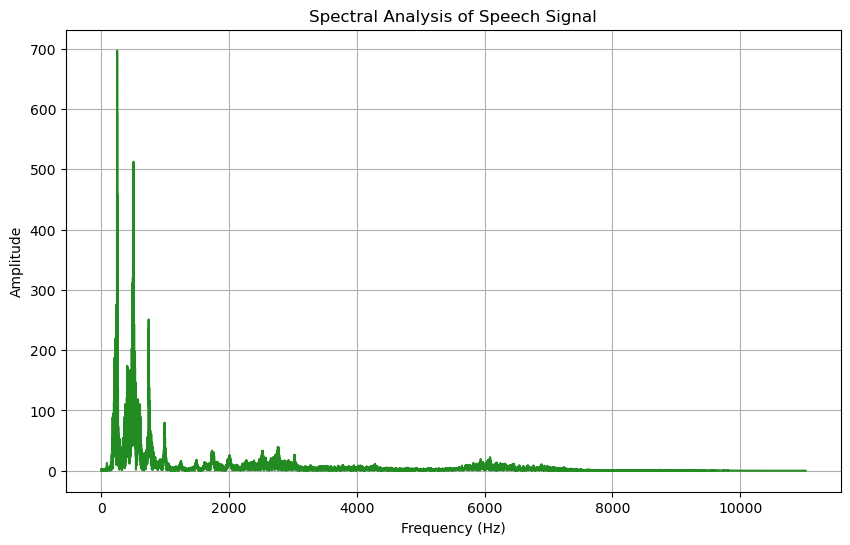

In [3]:
fft_output = np.fft.fft(y)
f_freq = np.fft.fftfreq(len(y), 1/sr)
plt.figure(figsize=(10, 6))
plt.plot(f_freq[:len(f_freq)//2], np.abs(fft_output)[:len(f_freq)//2],color='forestgreen')  
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectral Analysis of Speech Signal')
plt.grid(True)
plt.show()

A2. Use numpy.fft.ifft() to inverse transform the frequency spectrum of the speech signal from frequency domain to time domain. Compare the generated time domain signal with the original signal.


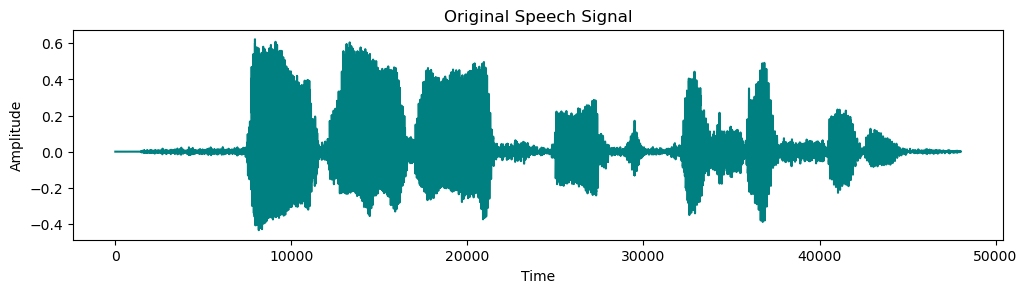

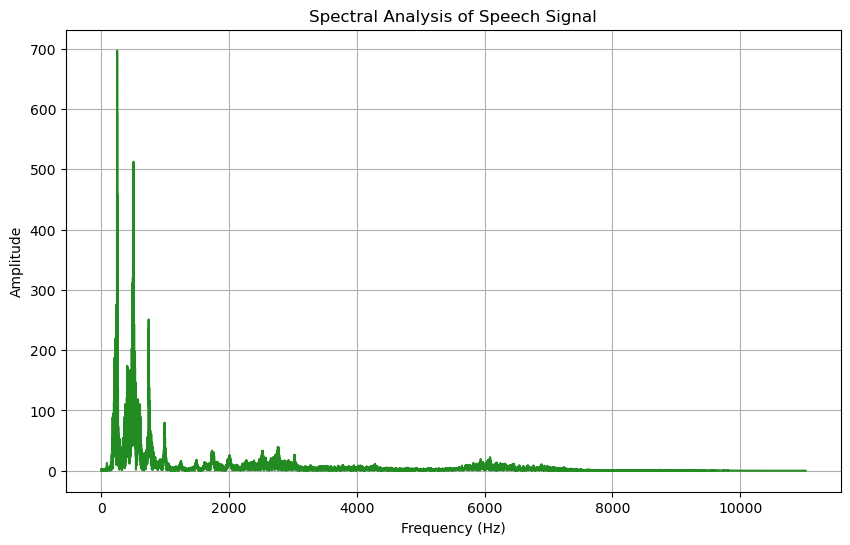

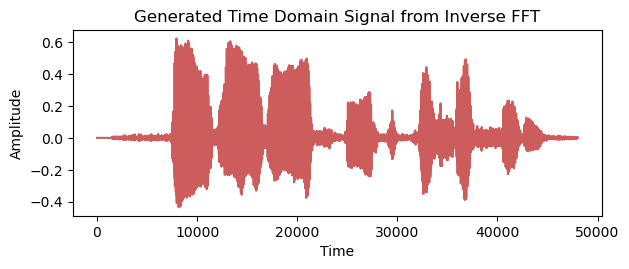

In [4]:
ifft_output = np.fft.ifft(fft_output)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(y,color='teal')
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

fft_output = np.fft.fft(y)
f_freq = np.fft.fftfreq(len(y), 1/sr)
plt.figure(figsize=(10, 6))
plt.plot(f_freq[:len(f_freq)//2], np.abs(fft_output)[:len(f_freq)//2],color='forestgreen')  
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectral Analysis of Speech Signal')
plt.grid(True)
plt.show()
plt.subplot(2, 1, 2)
# Taking the real numerical part only; ifft may introduce small imaginary components due to numerical errors
plt.plot(ifft_output.real,color='indianred')  
plt.title('Generated Time Domain Signal from Inverse FFT')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


 Since the two graphs are similar, it shows that the inverse FFT process successfully reconstructed the original signal from its frequency spectrum

A3. Perform the spectral analysis of a word present in the recorded speech. Compare the spectrum with the spectrum of the full signal.

In [5]:
start_time = 0
end_time = 1
start_index = int(start_time * sr)
end_index = int(end_time * sr)
word_segment = y[start_index:end_index]
ipd.Audio(word_segment, rate=sr)

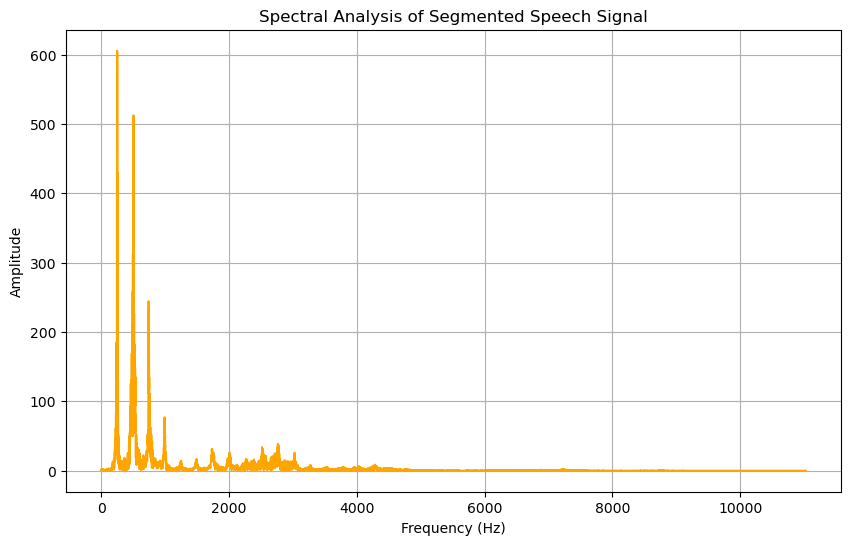

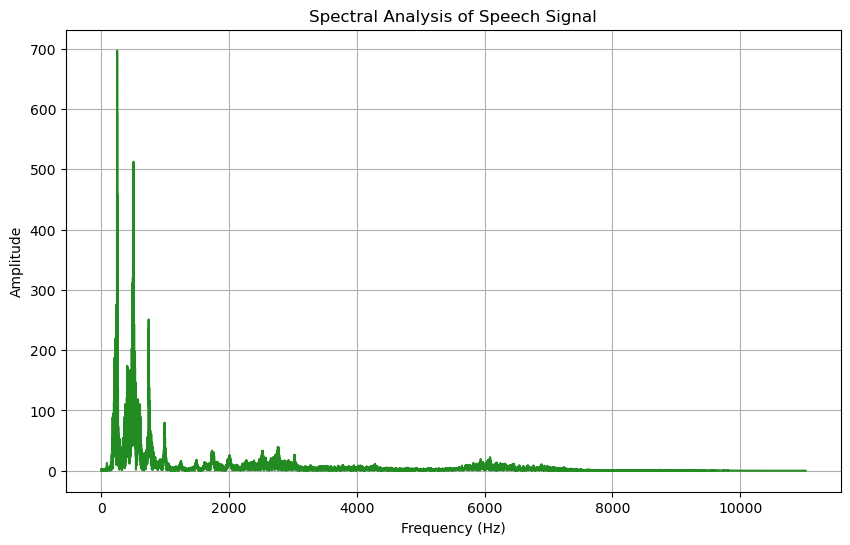

In [7]:
fft_output_seg = np.fft.fft(word_segment)
seg_freq = np.fft.fftfreq(len(word_segment), 1/sr)
plt.figure(figsize=(10, 6))
plt.plot(seg_freq[:len(seg_freq)//2], np.abs(fft_output_seg)[:len(seg_freq)//2],color='orange')  
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectral Analysis of Segmented Speech Signal')
plt.grid(True)
plt.show()
fft_output = np.fft.fft(y)
f_freq = np.fft.fftfreq(len(y), 1/sr)
plt.figure(figsize=(10, 6))
plt.plot(f_freq[:len(f_freq)//2], np.abs(fft_output)[:len(f_freq)//2],color='forestgreen')  
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectral Analysis of Speech Signal')
plt.grid(True)
plt.show()

A4. Take a rectangular window of 20 mili-second sampled at 22.5 KHz. Using FFT, analyse the spectral components.

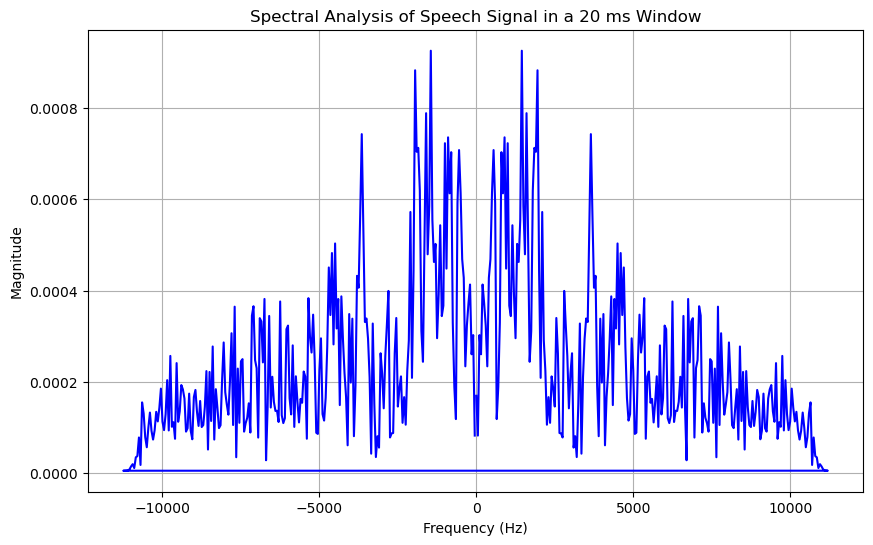

In [8]:
window_length_ms = 20  
sampling_rate = 22500
window_length_samples = int(window_length_ms * sampling_rate / 1000)
speech_window = y[:window_length_samples]

fft_result = np.fft.fft(speech_window)
fft_magnitude = np.abs(fft_result)
fft_freq = np.fft.fftfreq(window_length_samples, 1/sampling_rate)

plt.figure(figsize=(10, 6))
plt.plot(fft_freq, fft_magnitude, color='blue')
plt.title('Spectral Analysis of Speech Signal in a 20 ms Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

A5. Break your speech signal into window lengths of 20 mSec intervals. Evaluate the frequency components using numpy.fft.rfft(). Stack these frequency components as columns in a matrix. Use heatmap plot to display the matrix. You may use librosa.stft() or scipy.signal.stft() as well to achieve this.

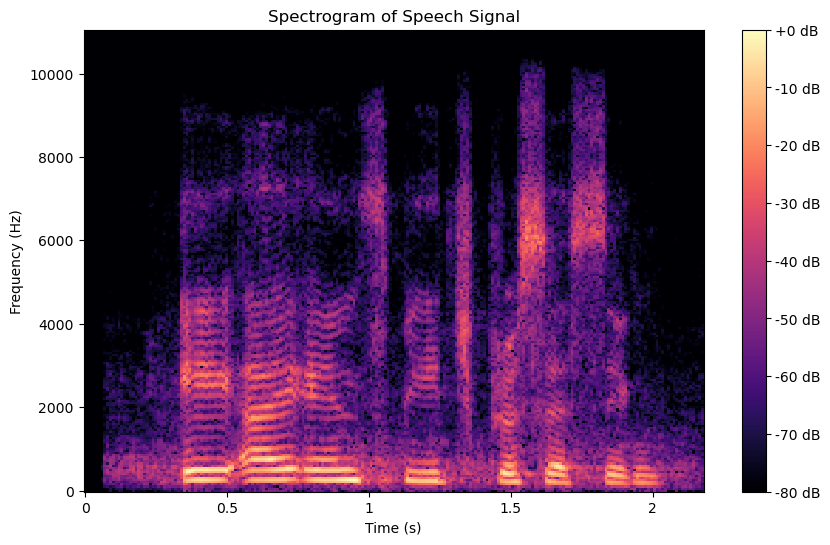

In [9]:
window_length_ms = 20  
window_length_samples = int(window_length_ms * sr / 1000)
hop_length = int(window_length_samples / 2)

D = librosa.stft(y, n_fft=window_length_samples, hop_length=hop_length)
spectrogram = np.abs(D)

plt.figure(figsize=(10, 6))
librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), sr=sr, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Speech Signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

A6. Use scipy.signal.spectrogram() to plot the spectrogram of the speech signal at the same duration. Compare the plots.

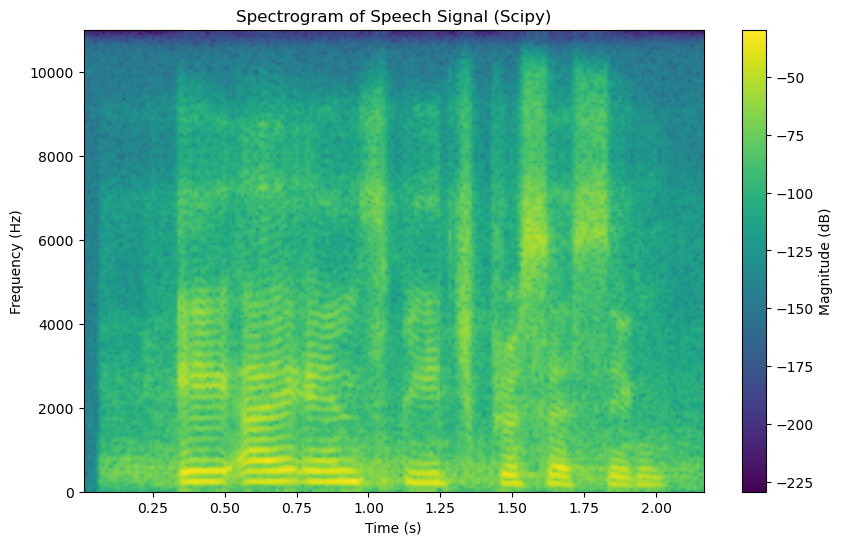

In [10]:
from scipy import signal
frequencies, times, spectrogram = signal.spectrogram(y, fs=sr, window='hann', nperseg=window_length_samples, noverlap=hop_length)
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram), shading='gouraud')
plt.title('Spectrogram of Speech Signal (Scipy)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Magnitude (dB)')
plt.show()